<div style="color:Blue;background-color:yellow;padding:0.5%;border-radius:150px 150px;font-size:3rem;text-align:center">Data analysis with-LR-DT-RF-and-SVM-99.6% AUC</div>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
matplotlib.rcParams.update({'font.size': 15})


In [3]:
plt.style.use("dark_background")

In [4]:
df = pd.read_csv("datasets/predictive_maintenance.csv")

In [5]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [8]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [9]:
df.shape

(10000, 10)

In [10]:
df=df.drop(['UDI', 'Product ID'], axis=1)

In [11]:
df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Failure Type'],
      dtype='object')

In [12]:
df.shape

(10000, 8)

In [13]:
df['Air temperature [K]']= df['Air temperature [K]'] - 273.15
df['Process temperature [K]']=df['Process temperature [K]'] - 273.15

df.rename(columns={"Air temperature [K]":"Air temperature [c]", "Process temperature [K]":"Process temperature [c]"})
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,24.95,35.45,1551,42.8,0,0,No Failure
1,L,25.05,35.55,1408,46.3,3,0,No Failure
2,L,24.95,35.35,1498,49.4,5,0,No Failure
3,L,25.05,35.45,1433,39.5,7,0,No Failure
4,L,25.05,35.55,1408,40.0,9,0,No Failure


In [14]:
df["temperature difference [c]"] = df["Process temperature [K]"] - df["Air temperature [K]"] 

In [15]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,temperature difference [c]
0,M,24.95,35.45,1551,42.8,0,0,No Failure,10.5
1,L,25.05,35.55,1408,46.3,3,0,No Failure,10.5
2,L,24.95,35.35,1498,49.4,5,0,No Failure,10.4
3,L,25.05,35.45,1433,39.5,7,0,No Failure,10.4
4,L,25.05,35.55,1408,40.0,9,0,No Failure,10.5


In [16]:
df.isna().sum()

Type                          0
Air temperature [K]           0
Process temperature [K]       0
Rotational speed [rpm]        0
Torque [Nm]                   0
Tool wear [min]               0
Target                        0
Failure Type                  0
temperature difference [c]    0
dtype: int64

In [17]:
df.isnull().sum()

Type                          0
Air temperature [K]           0
Process temperature [K]       0
Rotational speed [rpm]        0
Torque [Nm]                   0
Tool wear [min]               0
Target                        0
Failure Type                  0
temperature difference [c]    0
dtype: int64

In [18]:
df.dtypes

Type                           object
Air temperature [K]           float64
Process temperature [K]       float64
Rotational speed [rpm]          int64
Torque [Nm]                   float64
Tool wear [min]                 int64
Target                          int64
Failure Type                   object
temperature difference [c]    float64
dtype: object

In [19]:
df.describe().style.background_gradient(cmap="magma")

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,temperature difference [c]
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,26.854930,36.855560,1538.776100,39.986910,107.951000,0.033900,10.000630
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,1.001094
min,22.150000,32.550000,1168.000000,3.800000,0.000000,0.000000,7.600000
25%,25.150000,35.650000,1423.000000,33.200000,53.000000,0.000000,9.300000
50%,26.950000,36.950000,1503.000000,40.100000,108.000000,0.000000,9.800000
75%,28.350000,37.950000,1612.000000,46.800000,162.000000,0.000000,11.000000
max,31.350000,40.650000,2886.000000,76.600000,253.000000,1.000000,12.100000


<AxesSubplot: >

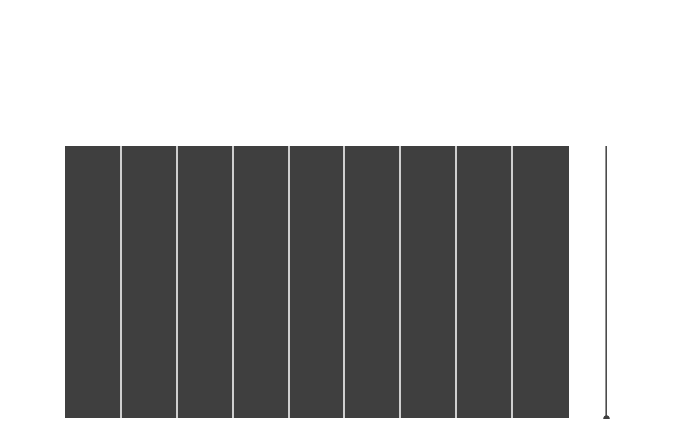

In [20]:
import missingno as msno
msno.matrix(df, figsize=(10,5), fontsize=13)

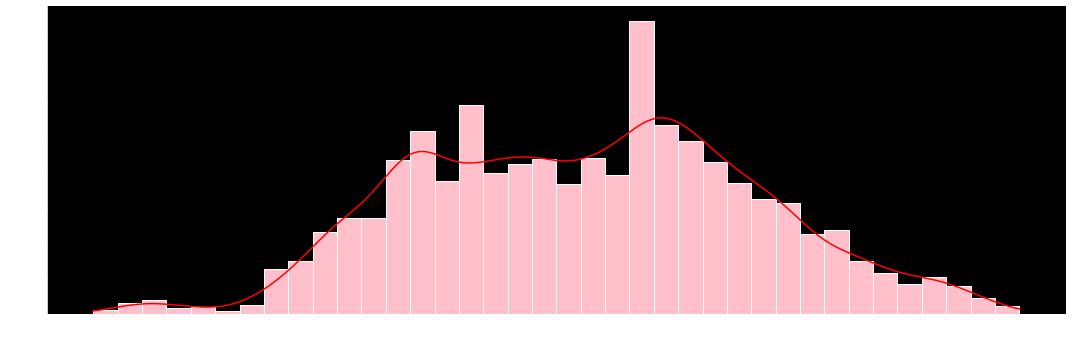

In [21]:
sns.displot(data=df, x='Process temperature [K]', kde= True, facecolor='pink', color = 'red', height=5, aspect=3)


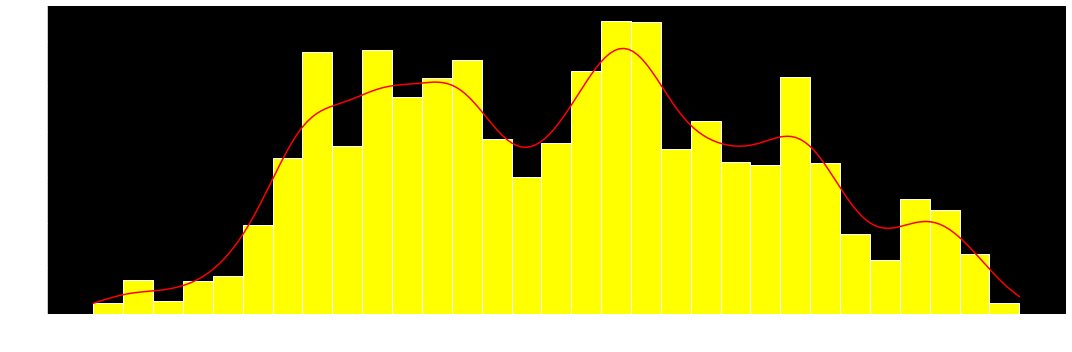

In [22]:
sns.displot(data=df, x='Air temperature [K]', kde= True, facecolor='yellow', color = 'red', height=5, aspect=3)

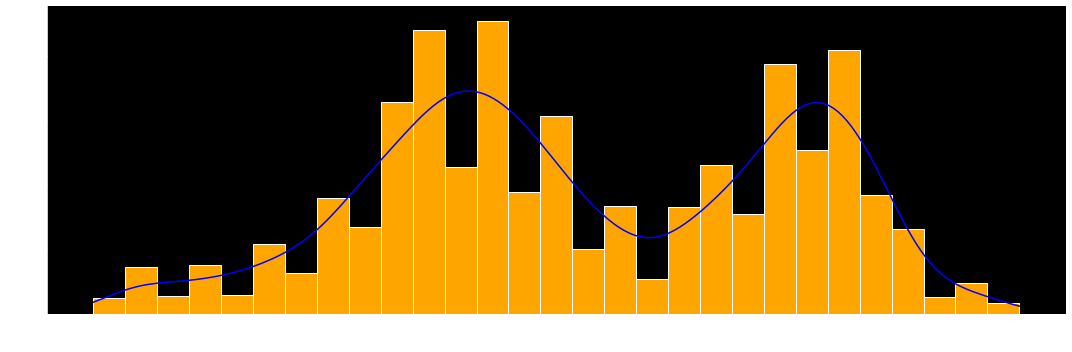

In [23]:
sns.displot(data=df, x='temperature difference [c]', kde= True, facecolor='orange', color = 'blue', height=5, aspect=3)

In [24]:
df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Failure Type', 'temperature difference [c]'],
      dtype='object')

<AxesSubplot: ylabel='Type'>

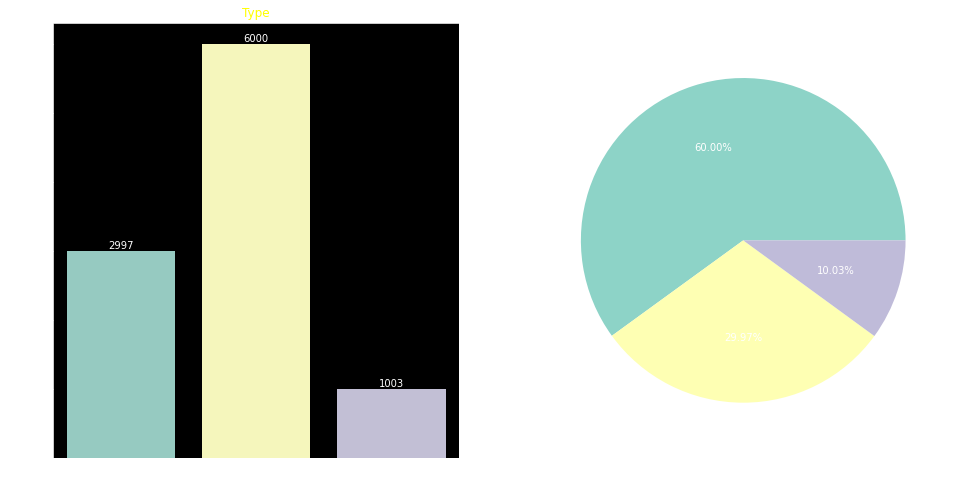

In [25]:
plt.figure(figsize=(16,8))

ax=plt.subplot(1,2,1)
plt.title("Type", color="yellow")
sns.countplot(x="Type", data=df)
ax.bar_label(ax.containers[0])

ax=plt.subplot(1,2,2)
df["Type"].value_counts().plot.pie(autopct='%1.2f%%')

In [26]:
df["Target"].value_counts()

0    9661
1     339
Name: Target, dtype: int64

<AxesSubplot: ylabel='Target'>

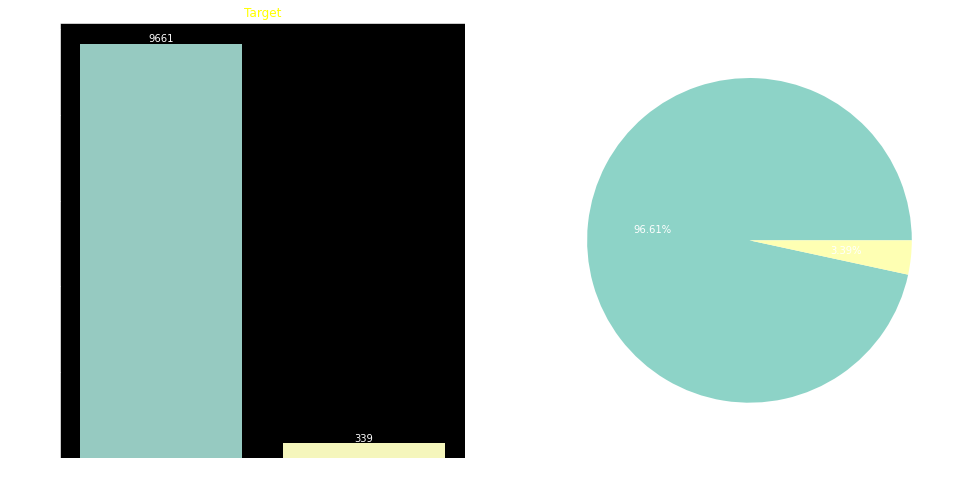

In [27]:
plt.figure(figsize=(16,8))

ax=plt.subplot(1,2,1)
plt.title("Target", color="yellow")
sns.countplot(x="Target", data=df)
ax.bar_label(ax.containers[0])

ax=plt.subplot(1,2,2)
df["Target"].value_counts().plot.pie(autopct='%1.2f%%')

In [28]:
print(df["Failure Type"].unique())
print(df['Failure Type'].value_counts())

['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure']
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64


<AxesSubplot: title={'center': "hue is 'Failure Type'"}, xlabel='Torque [Nm]', ylabel='Rotational speed [rpm]'>

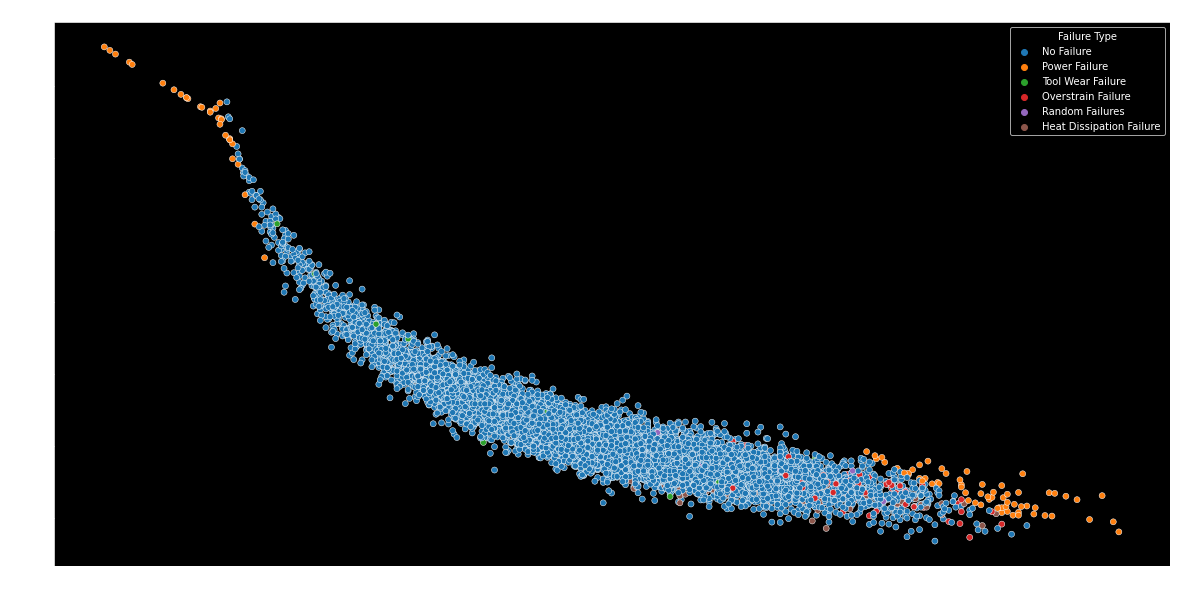

In [29]:
plt.figure(figsize=(20,10))
plt.title("hue is 'Failure Type'")
sns.scatterplot(x="Torque [Nm]", y="Rotational speed [rpm]", data=df, hue="Failure Type", palette="tab10")

<AxesSubplot: title={'center': "hue is 'Target'"}, xlabel='Torque [Nm]', ylabel='Rotational speed [rpm]'>

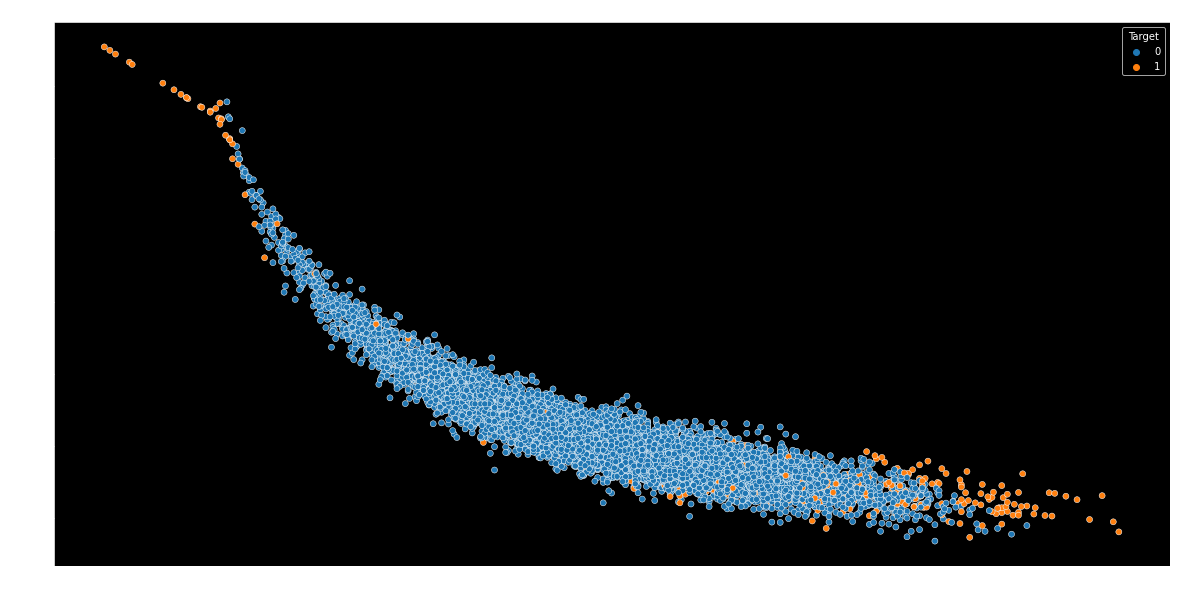

In [30]:
plt.figure(figsize=(20,10))
plt.title("hue is 'Target'")
sns.scatterplot(x="Torque [Nm]", y="Rotational speed [rpm]", data=df, hue="Target", palette="tab10")

In [31]:
df.dtypes

Type                           object
Air temperature [K]           float64
Process temperature [K]       float64
Rotational speed [rpm]          int64
Torque [Nm]                   float64
Tool wear [min]                 int64
Target                          int64
Failure Type                   object
temperature difference [c]    float64
dtype: object

<AxesSubplot: title={'center': "hue is 'Type'"}, xlabel='Torque [Nm]', ylabel='Rotational speed [rpm]'>

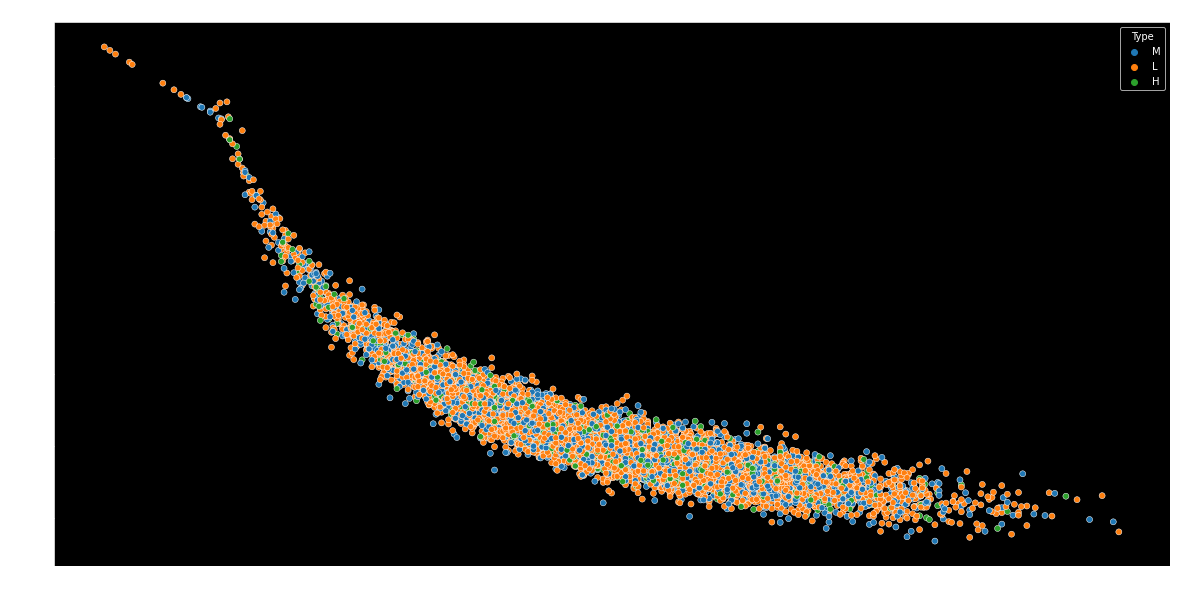

In [32]:
plt.figure(figsize=(20,10))
plt.title("hue is 'Type'")
sns.scatterplot(x="Torque [Nm]", y="Rotational speed [rpm]", data=df, hue="Type", palette="tab10")

In [33]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["Failure Type"]=encoder.fit_transform(df["Failure Type"])
df["Type"]=encoder.fit_transform(df["Type"])

In [34]:
df.dtypes


Type                            int32
Air temperature [K]           float64
Process temperature [K]       float64
Rotational speed [rpm]          int64
Torque [Nm]                   float64
Tool wear [min]                 int64
Target                          int64
Failure Type                    int32
temperature difference [c]    float64
dtype: object

In [35]:
df.head()


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,temperature difference [c]
0,2,24.95,35.45,1551,42.8,0,0,1,10.5
1,1,25.05,35.55,1408,46.3,3,0,1,10.5
2,1,24.95,35.35,1498,49.4,5,0,1,10.4
3,1,25.05,35.45,1433,39.5,7,0,1,10.4
4,1,25.05,35.55,1408,40.0,9,0,1,10.5


## **train test splitting**
 

In [36]:
X = df.drop("Failure Type", axis=1)
y= df["Failure Type"]

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## **Logistic Regression** ##

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [45]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [46]:
y_pred = lr.predict(X_test)
 
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 96.83333333333334


## **Decision Tree** ##

In [48]:
from sklearn.tree import DecisionTreeClassifier


In [80]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [81]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [82]:
dt_y_pred = dt.predict(X_test)
acc = accuracy_score(y_test, dt_y_pred)
print("Decision Tree model accuracy (in %):", acc*100)

Decision Tree model accuracy (in %): 99.7


## **Random Forest** ##

In [83]:
from sklearn.ensemble import RandomForestClassifier  
rf= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
rf.fit(X_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [84]:
rf_y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, rf_y_pred)
print("Random Forest model accuracy (in %):", acc*100)

Random Forest model accuracy (in %): 99.46666666666667


## **Support Vector** ##

In [87]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [88]:
svc_y_pred = svc.predict(X_test)
acc = accuracy_score(y_test, svc_y_pred)
print("Support Vector Classifier accuracy (in %):", acc*100)

Support Vector Classifier accuracy (in %): 99.6
